In [3]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
import numpy as np

from os.path import join
from astropy.io import fits

from lsst.eotest.sensor import MaskedCCD
from ctisim import SegmentSimulator, LinearTrap, LogisticTrap, ITL_AMP_GEOM
from ctisim.core import BaseOutputAmplifier, FloatingOutputAmplifier

# Simulated Deferred Charge

Text(0.5, 0, 'Signal [e-]')

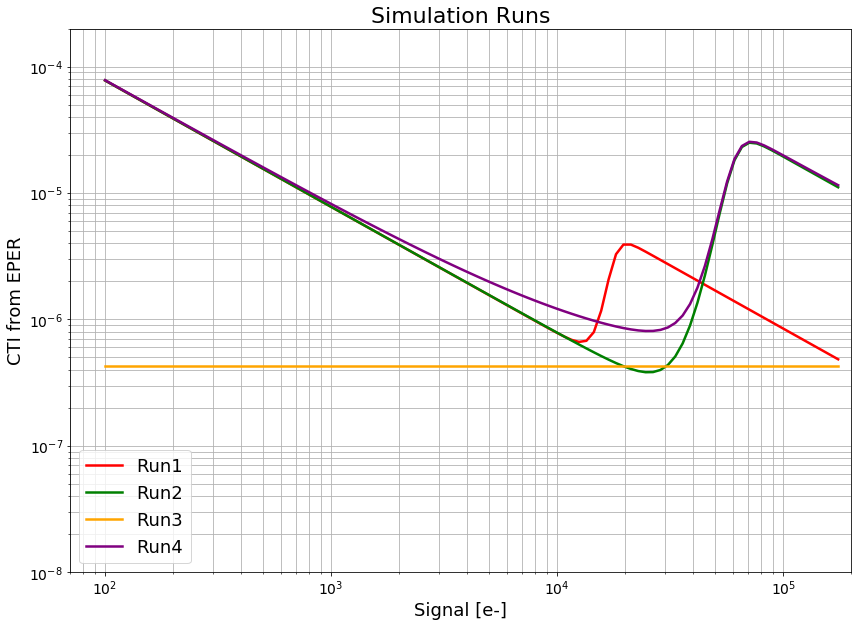

In [4]:
signals = np.logspace(2, np.log10(175000.), 100)
output_amplifier = BaseOutputAmplifier(1.0)
floating_output_amplifier = FloatingOutputAmplifier(1.0, 0.0002, 2.4)

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

## Run1
cti = 0.0
low_trap = LinearTrap(4.0, 0.4, 1, 0.08)
med_trap = LogisticTrap(40.0, 0.4, 1, 17500., 0.001)

imarr = np.zeros((signals.shape[0], ITL_AMP_GEOM.nx))
ramp = SegmentSimulator(imarr, ITL_AMP_GEOM.prescan_width, output_amplifier, 
                        cti=cti, traps=[low_trap, med_trap])
ramp.ramp_exp(signals)

segarr = ramp.readout(serial_overscan_width=ITL_AMP_GEOM.serial_overscan_width,
                               parallel_overscan_width=0)

last_pix = segarr[:, 511]
oscan1 = segarr[:, 512]
oscan2 = segarr[:, 513]
cti_run1 = ((oscan1+oscan2)/(511*last_pix))

## Run2
cti = 0.0
low_trap = LinearTrap(4.0, 0.4, 1, 0.08)
med_trap = LogisticTrap(1000.0, 0.4, 1, 60000., 0.0002)

imarr = np.zeros((signals.shape[0], ITL_AMP_GEOM.nx))
ramp = SegmentSimulator(imarr, ITL_AMP_GEOM.prescan_width, output_amplifier, 
                        cti=cti, traps=[low_trap, med_trap])
ramp.ramp_exp(signals)

segarr = ramp.readout(serial_overscan_width=ITL_AMP_GEOM.serial_overscan_width,
                               parallel_overscan_width=0)

last_pix = segarr[:, 511]
oscan1 = segarr[:, 512]
oscan2 = segarr[:, 513]
cti_run2 = ((oscan1+oscan2)/(511*last_pix))

## Run4
cti = 0.0
low_trap = LinearTrap(4.0, 0.4, 1, 0.08)
med_trap = LogisticTrap(1000.0, 0.4, 1, 60000., 0.0002)

imarr = np.zeros((signals.shape[0], ITL_AMP_GEOM.nx))
ramp = SegmentSimulator(imarr, ITL_AMP_GEOM.prescan_width, floating_output_amplifier, 
                        cti=cti)
ramp.ramp_exp(signals)

segarr = ramp.readout(serial_overscan_width=ITL_AMP_GEOM.serial_overscan_width,
                               parallel_overscan_width=0)

last_pix = segarr[:, 511]
oscan1 = segarr[:, 512]
oscan2 = segarr[:, 513]
cti_run3 = ((oscan1+oscan2)/(511*last_pix))

## Run4
cti = 0.0
low_trap = LinearTrap(4.0, 0.4, 1, 0.08)
med_trap = LogisticTrap(1000.0, 0.4, 1, 60000., 0.0002)

imarr = np.zeros((signals.shape[0], ITL_AMP_GEOM.nx))
ramp = SegmentSimulator(imarr, ITL_AMP_GEOM.prescan_width, floating_output_amplifier, 
                        cti=cti, traps=[low_trap, med_trap])
ramp.ramp_exp(signals)

segarr = ramp.readout(serial_overscan_width=ITL_AMP_GEOM.serial_overscan_width,
                               parallel_overscan_width=0)

last_pix = segarr[:, 511]
oscan1 = segarr[:, 512]
oscan2 = segarr[:, 513]
cti_run4 = ((oscan1+oscan2)/(511*last_pix))

ax.plot(signals, cti_run1, linewidth=2.5, color='red', label='Run1')
ax.plot(signals, cti_run2, linewidth=2.5, color='green', label='Run2')
ax.plot(signals, cti_run3, linewidth=2.5, color='orange', label='Run3')
ax.plot(signals, cti_run4, linewidth=2.5, color='purple', label='Run4')

ax.set_title('Simulation Runs', fontsize=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.E-8, 2.E-4)
ax.set_xlim(70., 200000.)
ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(which='both')
ax.set_ylabel('CTI from EPER', fontsize=18)
ax.set_xlabel('Signal [e-]', fontsize=18)

# Flat Field Overscan Comparison

In [11]:
run1_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Flats_Run1'
run2_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Flats_Run2'
run3_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Flats_Run3'
run4_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Flats_Run4'

original_flats = sorted(glob.glob(join(run4_dir, '*_processed.fits')))
corrected_flats = sorted(glob.glob(join(run4_dir, '*_corrected.fits')))

run1_flats = sorted(glob.glob(join(run1_dir, '*_processed.fits')))
run2_flats = sorted(glob.glob(join(run2_dir, '*_processed.fits')))
run3_flats = sorted(glob.glob(join(run3_dir, '*_processed.fits')))
run4_flats = sorted(glob.glob(join(run4_dir, '*_processed.fits')))

Text(0.5, 0, 'Signal [e-]')

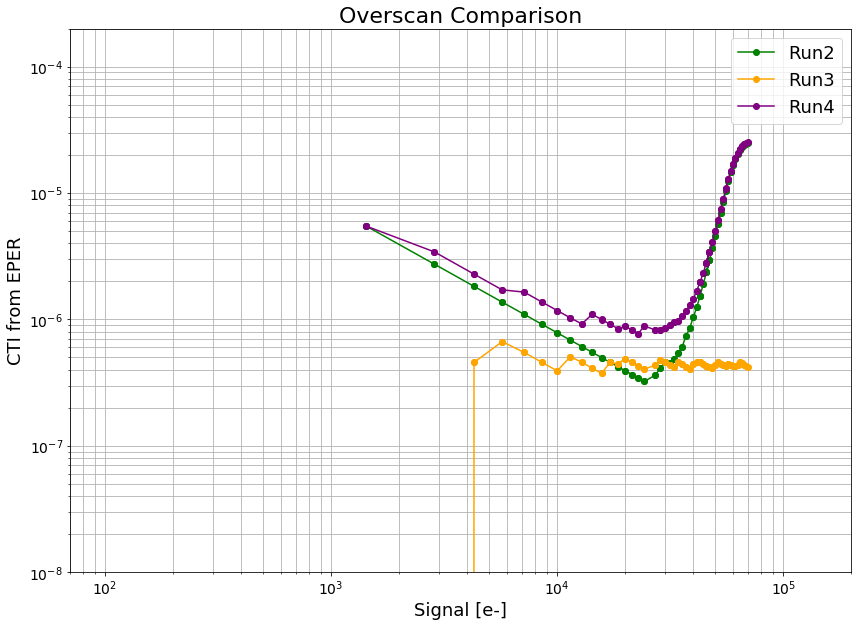

In [12]:
signals = np.zeros(len(original_flats))
cti_original = np.zeros(len(original_flats))
cti_corrected = np.zeros(len(original_flats))

amp = 16
        
for i, flat in enumerate(run2_flats):
    with fits.open(flat) as hdulist:

        data = hdulist[amp].data
        last_pix = np.mean(data[:, 511])
        oscans = np.mean(np.sum(data[:, 512:514], axis=1))
        cti_run2[i] = oscans/(511*last_pix)
        signals[i] = np.median(data[100:1900, 50:450])
        
for i, flat in enumerate(run3_flats):
    with fits.open(flat) as hdulist:

        data = hdulist[amp].data
        last_pix = np.mean(data[:, 511])
        oscans = np.mean(np.sum(data[:, 512:514], axis=1))
        cti_run3[i] = oscans/(511*last_pix)
        signals[i] = np.median(data[100:1900, 50:450])
        
for i, flat in enumerate(run4_flats):
    with fits.open(flat) as hdulist:
        try:
            data = hdulist[amp].data
            last_pix = np.mean(data[:, 511])
            oscans = np.mean(np.sum(data[:, 512:514], axis=1))
            cti_run4[i] = oscans/(511*last_pix)
        except IndexError:
            print(flat)
        
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
#ax.plot(signals, cti_run1, label='Run1', color='red', marker='o')
ax.plot(signals, cti_run2, label='Run2', color='green', marker='o')
ax.plot(signals, cti_run3, label='Run3', color='orange', marker='o')
ax.plot(signals, cti_run4, label='Run4', color='purple', marker='o')

ax.set_title('Overscan Comparison', fontsize=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(70., 200000.)
ax.set_ylim(1.E-8, 2.E-4)
ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(which='both')
ax.set_ylabel('CTI from EPER', fontsize=18)
ax.set_xlabel('Signal [e-]', fontsize=18)

# Source Moment Comparison

In [23]:
original_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots'
run1_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run1'
run2_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run2'
run3_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run3'
run4_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run4'

original_catalogs = sorted(glob.glob(join(original_dir, '*.cat')))
run1_catalogs = sorted(glob.glob(join(run1_dir, 'catalogs', '*processed*.cat')))
run2_catalogs = sorted(glob.glob(join(run2_dir, 'catalogs', '*processed*.cat')))
run3_catalogs = sorted(glob.glob(join(run3_dir, 'catalogs', '*processed*.cat')))
run4_catalogs = sorted(glob.glob(join(run4_dir, 'catalogs', '*processed*.cat')))

x_kwd = 'ext_shapeHSM_HsmSourceMoments_x'
y_kwd = 'ext_shapeHSM_HsmSourceMoments_y'
xx_kwd = 'ext_shapeHSM_HsmSourceMoments_xx'
yy_kwd = 'ext_shapeHSM_HsmSourceMoments_yy'
xy_kwd = 'ext_shapeHSM_HsmSourceMoments_xy'
flux_kwd = 'base_CircularApertureFlux_12_0_instFlux'

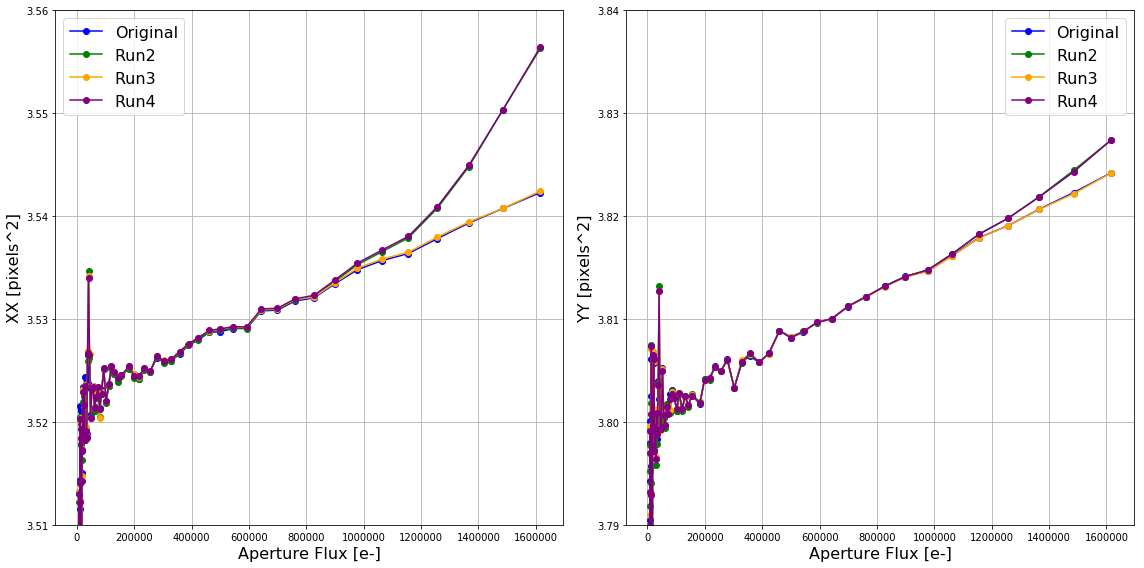

In [24]:
xx_results_original = []
yy_results_original = []
flux_results_original = []
xx_results_run1 = []
yy_results_run1 = []
flux_results_run1 = []
xx_results_run2 = []
yy_results_run2 = []
flux_results_run2 = []
xx_results_run3 = []
yy_results_run3 = []
flux_results_run3 = []
xx_results_run4 = []
yy_results_run4 = []
flux_results_run4 = []

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

## Run2 Catalogs
for i, catalog in enumerate(original_catalogs):
    src = fits.getdata(catalog)
    
    if src[xx_kwd].shape[0] < 1200.:
        continue
    xx_results_original.append(np.nanmedian(src[xx_kwd]))
    yy_results_original.append(np.nanmedian(src[yy_kwd]))
    flux_results_original.append(np.nanmedian(src[flux_kwd]))
    
axes[0].plot(flux_results_original, xx_results_original, c='blue', label='Original', marker='o')
axes[1].plot(flux_results_original, yy_results_original, c='blue', label='Original', marker='o')

## Run2 Catalogs
for i, catalog in enumerate(run2_catalogs):
    src = fits.getdata(catalog)
    
    if src[xx_kwd].shape[0] < 1200.:
        continue
    xx_results_run2.append(np.nanmedian(src[xx_kwd]))
    yy_results_run2.append(np.nanmedian(src[yy_kwd]))
    flux_results_run2.append(np.nanmedian(src[flux_kwd]))
    
axes[0].plot(flux_results_run2, xx_results_run2, c='green', label='Run2', marker='o')
axes[1].plot(flux_results_run2, yy_results_run2, c='green', label='Run2', marker='o')

## Run3 Catalogs
for i, catalog in enumerate(run3_catalogs):
    src = fits.getdata(catalog)
    
    if src[xx_kwd].shape[0] < 1200.:
        continue
    xx_results_run3.append(np.nanmedian(src[xx_kwd]))
    yy_results_run3.append(np.nanmedian(src[yy_kwd]))
    flux_results_run3.append(np.nanmedian(src[flux_kwd]))

axes[0].plot(flux_results_run3, xx_results_run3, c='orange', label='Run3', marker='o')
axes[1].plot(flux_results_run3, yy_results_run3, c='orange', label='Run3', marker='o')

## Run4 Catalogs
for i, catalog in enumerate(run4_catalogs):
    src = fits.getdata(catalog)
    
    if src[xx_kwd].shape[0] < 1200.:
        continue
    xx_results_run4.append(np.nanmedian(src[xx_kwd]))
    yy_results_run4.append(np.nanmedian(src[yy_kwd]))
    flux_results_run4.append(np.nanmedian(src[flux_kwd]))

im0 = axes[0].plot(flux_results_run4, xx_results_run4, c='purple', label='Run4', marker='o')
im1 = axes[1].plot(flux_results_run4, yy_results_run4, c='purple', label='Run4', marker='o')

#axes[0].set_xscale('log')
axes[0].set_ylabel('XX [pixels^2]', fontsize=16)
axes[0].set_xlabel('Aperture Flux [e-]', fontsize=16)
axes[0].set_ylim(bottom=3.51, top=3.56)
axes[0].legend(fontsize=16)
axes[0].grid(which='both')
#axes[1].set_xscale('log')
axes[1].set_ylabel('YY [pixels^2]', fontsize=16)
axes[1].set_xlabel('Aperture Flux [e-]', fontsize=16)
axes[1].set_ylim(bottom=3.79, top=3.84)
axes[1].grid(which='both')
axes[1].legend(fontsize=16)

plt.tight_layout()

In [30]:
run1_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run1'
run2_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run2'
run3_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run3'
run4_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Correction_Testing/Spots_Run4'

run1_catalogs = sorted(glob.glob(join(run1_dir, 'catalogs', '*corrected*.cat')))
run2_catalogs = sorted(glob.glob(join(run2_dir, 'catalogs', '*corrected*.cat')))
run3_catalogs = sorted(glob.glob(join(run3_dir, 'catalogs', '*corrected*.cat')))
run4_catalogs = sorted(glob.glob(join(run4_dir, 'catalogs', '*corrected*.cat')))

x_kwd = 'ext_shapeHSM_HsmSourceMoments_x'
y_kwd = 'ext_shapeHSM_HsmSourceMoments_y'
xx_kwd = 'ext_shapeHSM_HsmSourceMoments_xx'
yy_kwd = 'ext_shapeHSM_HsmSourceMoments_yy'
xy_kwd = 'ext_shapeHSM_HsmSourceMoments_xy'
flux_kwd = 'base_CircularApertureFlux_12_0_instFlux'

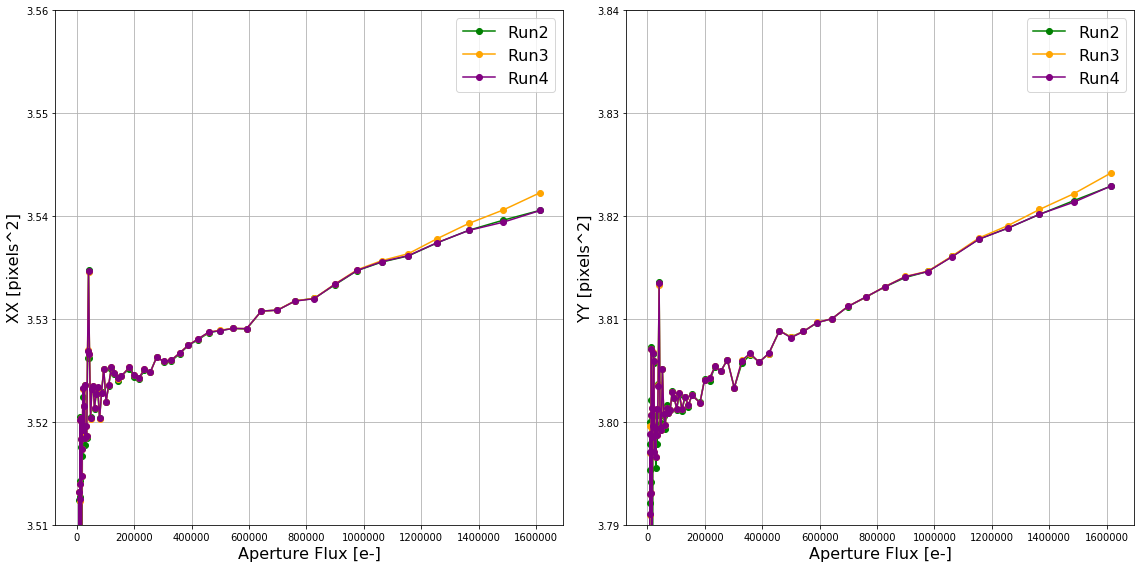

In [31]:
xx_results_run1 = []
yy_results_run1 = []
flux_results_run1 = []
xx_results_run2 = []
yy_results_run2 = []
flux_results_run2 = []
xx_results_run3 = []
yy_results_run3 = []
flux_results_run3 = []
xx_results_run4 = []
yy_results_run4 = []
flux_results_run4 = []

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

## Run2 Catalogs
for i, catalog in enumerate(run2_catalogs):
    src = fits.getdata(catalog)
    
    if src[xx_kwd].shape[0] < 1200.:
        continue
    xx_results_run2.append(np.nanmedian(src[xx_kwd]))
    yy_results_run2.append(np.nanmedian(src[yy_kwd]))
    flux_results_run2.append(np.nanmedian(src[flux_kwd]))
    
axes[0].plot(flux_results_run2, xx_results_run2, c='green', label='Run2', marker='o')
axes[1].plot(flux_results_run2, yy_results_run2, c='green', label='Run2', marker='o')

## Run3 Catalogs
for i, catalog in enumerate(run3_catalogs):
    src = fits.getdata(catalog)
    
    if src[xx_kwd].shape[0] < 1200.:
        continue
    xx_results_run3.append(np.nanmedian(src[xx_kwd]))
    yy_results_run3.append(np.nanmedian(src[yy_kwd]))
    flux_results_run3.append(np.nanmedian(src[flux_kwd]))

axes[0].plot(flux_results_run3, xx_results_run3, c='orange', label='Run3', marker='o')
axes[1].plot(flux_results_run3, yy_results_run3, c='orange', label='Run3', marker='o')

## Run4 Catalogs
for i, catalog in enumerate(run4_catalogs):
    src = fits.getdata(catalog)
    
    if src[xx_kwd].shape[0] < 1200.:
        continue
    xx_results_run4.append(np.nanmedian(src[xx_kwd]))
    yy_results_run4.append(np.nanmedian(src[yy_kwd]))
    flux_results_run4.append(np.nanmedian(src[flux_kwd]))

im0 = axes[0].plot(flux_results_run4, xx_results_run4, c='purple', label='Run4', marker='o')
im1 = axes[1].plot(flux_results_run4, yy_results_run4, c='purple', label='Run4', marker='o')

#axes[0].set_xscale('log')
axes[0].set_ylabel('XX [pixels^2]', fontsize=16)
axes[0].set_xlabel('Aperture Flux [e-]', fontsize=16)
axes[0].set_ylim(bottom=3.51, top=3.56)
axes[0].legend(fontsize=16)
axes[0].grid(which='both')
#axes[1].set_xscale('log')
axes[1].set_ylabel('YY [pixels^2]', fontsize=16)
axes[1].set_xlabel('Aperture Flux [e-]', fontsize=16)
axes[1].set_ylim(bottom=3.79, top=3.84)
axes[1].grid(which='both')
axes[1].legend(fontsize=16)

plt.tight_layout()

In [21]:
original_dir = '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots'
original_catalogs = glob.glob(join(original_dir, '*.cat'))


['/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_000_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_001_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_002_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_003_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_004_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_005_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_006_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_007_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_008_source_catalog.cat', '/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/Sim/Originals/Spots/bf_spots_009_source_catalog.cat', '/nfs/sla